# Импорти и глобални параметри

In [1]:
from dask import dataframe as dd
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_alive

In [2]:
plt.style.use('style.mplstyle')

In [3]:
SAVE_FILES = False

In [8]:
def parse_timestamp(timestamp, date_format):
    timestamp /= 1000
    timestamp = int(timestamp)
    timestamp += 1648806250

    dt = datetime.fromtimestamp(timestamp).strftime(date_format)
    dt = datetime.strptime(dt, date_format)

    return dt

# Импортиране на файлове

In [367]:
ddf_users = dd.read_csv('data\\raw\\2022_place_canvas_history_users.csv')
ddf_users.head()

,user_id
0,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...
1,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...
2,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...
3,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...
4,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...


In [4]:
ddf_main = dd.read_csv('data\\raw\\2022_place_canvas_history_core.csv')
ddf_main.head()

,timestamp,pixel_color,coordinate
0,0,#7EED56,"42,42"
1,12356,#00A368,"999,999"
2,16311,#3690EA,"44,42"
3,21388,#D4D7D9,"2,2"
4,34094,#3690EA,"23,23"


In [369]:
ddf_date = dd.read_csv('data\\raw\\2022_place_canvas_history_datetime.csv')
ddf_date.head()

,datetime
0,2022-04-01 12:00:00
1,2022-04-01 12:00:00
2,2022-04-01 12:00:00
3,2022-04-01 12:00:00
4,2022-04-01 12:00:00


In [433]:
ddf_pivoted = dd.read_csv('data\\raw\\2022_place_canvas_history_pivoted.csv')
ddf_pivoted.head()

,datetime,#000000,#00A368,#2450A4,#3690EA,#51E9F4,#7EED56,#811E9F,#898D90,#9C6926,...,#BE0039,#FF3881,#00CCC0,#515252,#6D001A,#94B3FF,#DE107F,#E4ABFF,#FFB470,#FFF8B8
0,2022-04-01 12:00:00,0,2,3,2,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-04-01 13:00:00,117511,21775,83172,15056,24328,21971,19421,7081,6169,...,0,0,0,0,0,0,0,0,0,0
2,2022-04-01 14:00:00,198737,33085,115221,20169,38124,30806,26811,12597,9609,...,0,0,0,0,0,0,0,0,0,0
3,2022-04-01 15:00:00,242980,35452,98686,25440,42816,33479,27869,17086,12235,...,0,0,0,0,0,0,0,0,0,0
4,2022-04-01 16:00:00,246588,40658,99270,29857,49147,37166,32077,20787,11657,...,0,0,0,0,0,0,0,0,0,0


# Диаграми

### Стълбовидна диаграма, представяща 20-те най-активни потребители

In [371]:
all_users = ddf_users.user_id.value_counts().compute().reset_index(name='num_placed_pixels')

In [372]:
most_active_users = all_users.head(20).set_index('index')
most_active_users.head()

,num_placed_pixels
index,
kgZoJz//JpfXgowLxOhcQlFYOCm8m6upa6Rpltcc63K6Cz0vEWJF/RYmlsaXsIQEbXrwz+Il3BkD8XZVx7YMLQ==,795
JMlte6XKe+nnFvxcjT0hHDYYNgiDXZVOkhr6KT60EtJAGaezxc4e/eah6JzTReWNdTH4fLueQ20A4drmfqbqsw==,781
LNbGhj45pAeCvBYQF1dPvwx1zVfVTy8AdRxTSHi0pR9YeabE3sAd3Rz1MbLFT5k14j0+grrVgqYO1/6BA/jBfQ==,777
8USqGo14WuZQLG7PSAwqfFwICkU0G4VyHZTuV8D1QSbQHE5GFdC2mIK/pMEC/qF1FQH912SDim3ptEFkYPrYMQ==,767
K54RRTUCFuOU55RzSTkjo/ftbJqVi9miyt52YV6NlENRfUyJTPJKBC47N/s2eh4iNdAKMKxa3gvL2XFqCc9AqQ==,767


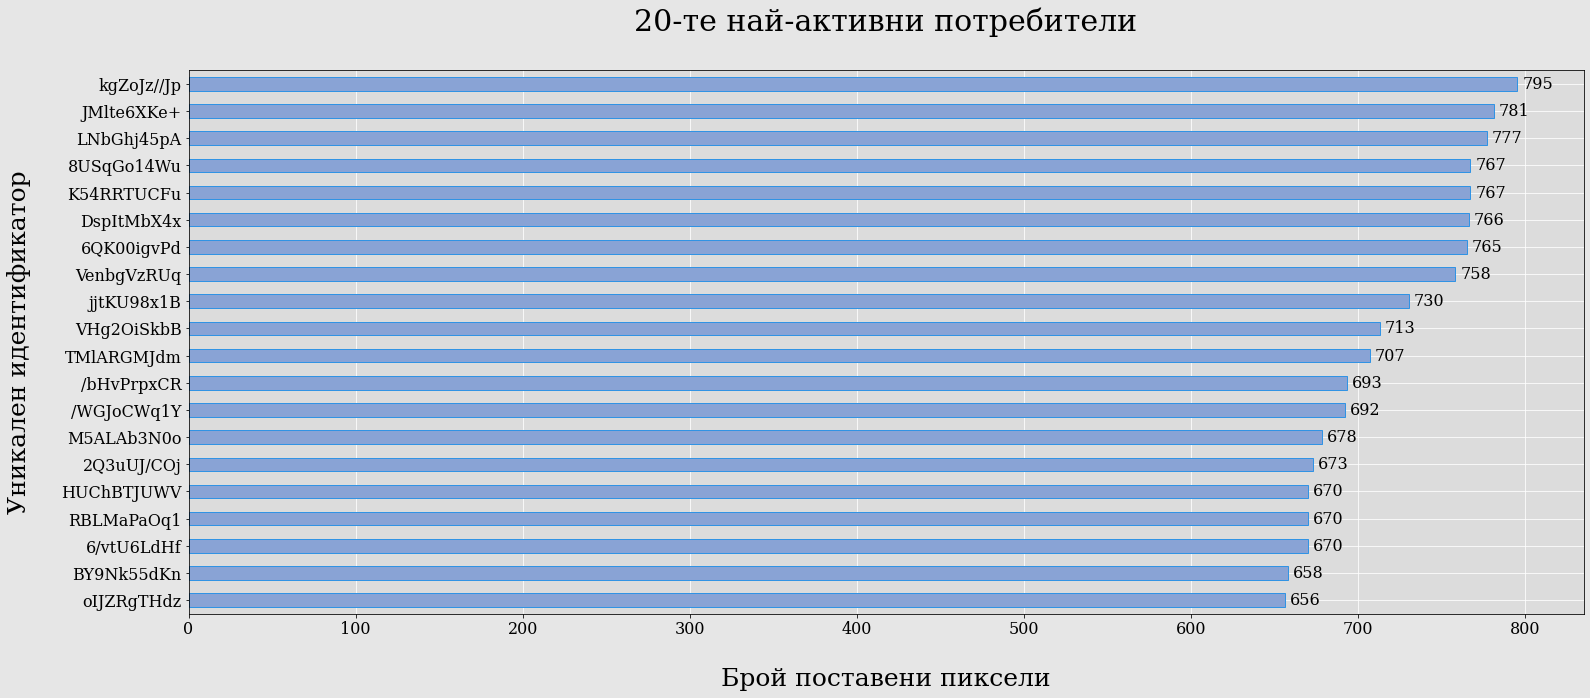

In [420]:
plot = most_active_users.plot(kind='barh', edgecolor='#3193E4')
plot.set_title('20-те най-активни потребители')
plot.set_xlabel('Брой поставени пиксели')
plot.set_ylabel('Уникален идентификатор')

y_tick_labels = []
for label in plot.get_yticklabels():
    y_tick_labels.append(label.get_text()[0:10])

plot.set_yticklabels(y_tick_labels)

bar_labels = plot.containers[0]
plot.axes.bar_label(bar_labels, padding=5, fontsize=16)

plot.invert_yaxis()

plot.get_legend().remove()

In [421]:
if SAVE_FILES:
    now = datetime.now().strftime('%d%H%M')

    fig = plot.get_figure()
    fig.savefig(f'output\\plot_users-{now}.png')

### Разпръсната диаграма, представяща броя потребители според това колко пиксели са поставили

In [375]:
num_active_users = all_users.num_placed_pixels.value_counts().reset_index(name='users')
num_active_users.head()

,index,users
0,1,2340498
1,2,1175052
2,3,768335
3,4,572021
4,5,460215


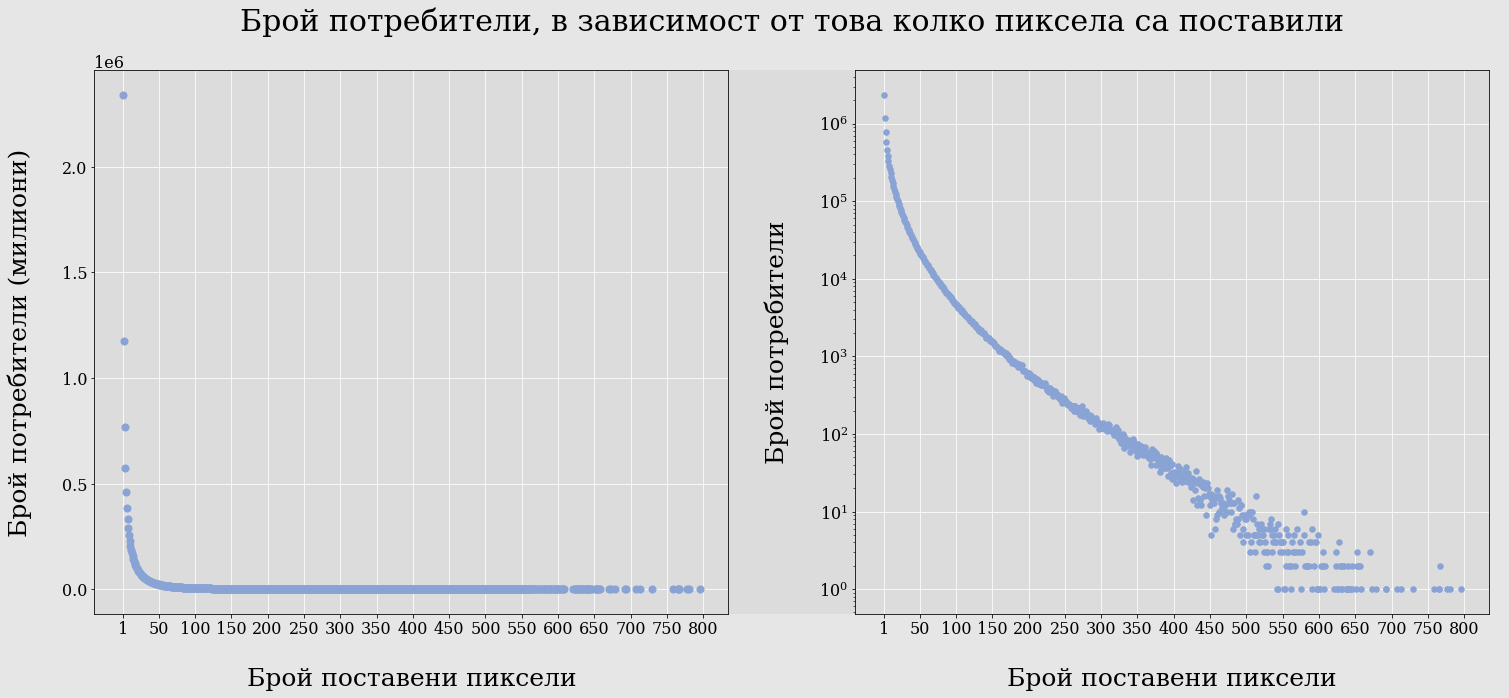

In [417]:
fig = plt.figure()
ax = fig.add_subplot(111)    
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='#E6E6E6', top=False, bottom=False, left=False, right=False)
ax.grid(False)

ax.set_title('Брой потребители, в зависимост от това колко пиксела са поставили')

num_active_users.plot(x=0, y=1, kind='scatter', zorder=3, s=50, ax=ax1)

ax1.set_xlabel('Брой поставени пиксели')
ax1.set_ylabel('Брой потребители (милиони)')
ax1.set_xticks([1,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])

num_active_users.plot(x=0, y=1, kind='scatter', zorder=3, s=30, ax=ax2)

ax2.set_xlabel('Брой поставени пиксели')
ax2.set_ylabel('Брой потребители')
ax2.set_yscale('log')
ax2.set_xticks([1,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])

In [418]:
if SAVE_FILES:
    now = datetime.now().strftime('%d%H%M')

    fig.savefig(f'output\\plot_activity-{now}.png')

### Диаграма, представяща броя поставени пиксели от всеки цвят

In [378]:
most_used_colors = ddf_main.pixel_color.value_counts().compute()

most_used_colors.head()

#000000    33707371
#FFFFFF    32251013
#FF4500    14411389
#2450A4     9989854
#FFD635     8519392
Name: pixel_color, dtype: int64

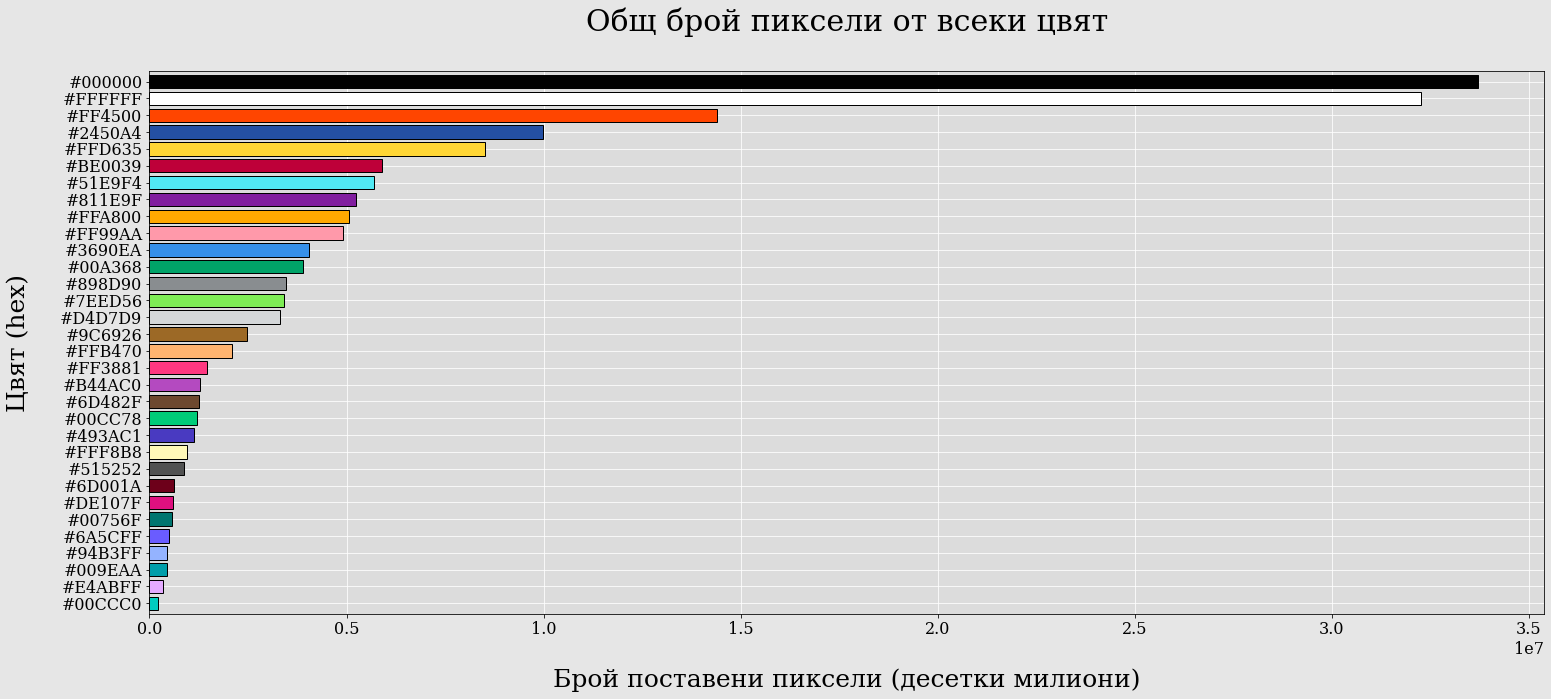

In [411]:
color_bars = []
for color_num in most_used_colors.iteritems():
    color_bars.append(color_num[0])

plot = most_used_colors.plot(kind='barh', color=color_bars, edgecolor='black', zorder=3, width=0.8)

plot.set_title('Общ брой пиксели от всеки цвят')
plot.set_xlabel('Брой поставени пиксели (десетки милиони)')
plot.set_ylabel('Цвят (hex)')

plot.set_yticklabels(color_bars)
    
plot.invert_yaxis()

In [412]:
if SAVE_FILES:
    now = datetime.now().strftime('%d%H%M')

    fig = plot.get_figure()
    fig.savefig(f'output\\plot_colors-{now}.png')

### Диаграма, преставяща 20-те най-често променяни точки

In [381]:
active_spots = ddf_main.coordinate.value_counts().compute()

In [382]:
top_active_spots = active_spots.head(20)
top_active_spots.head()

0,0        98807
359,564    69198
349,564    55230
859,766    52261
860,766    51485
Name: coordinate, dtype: int64

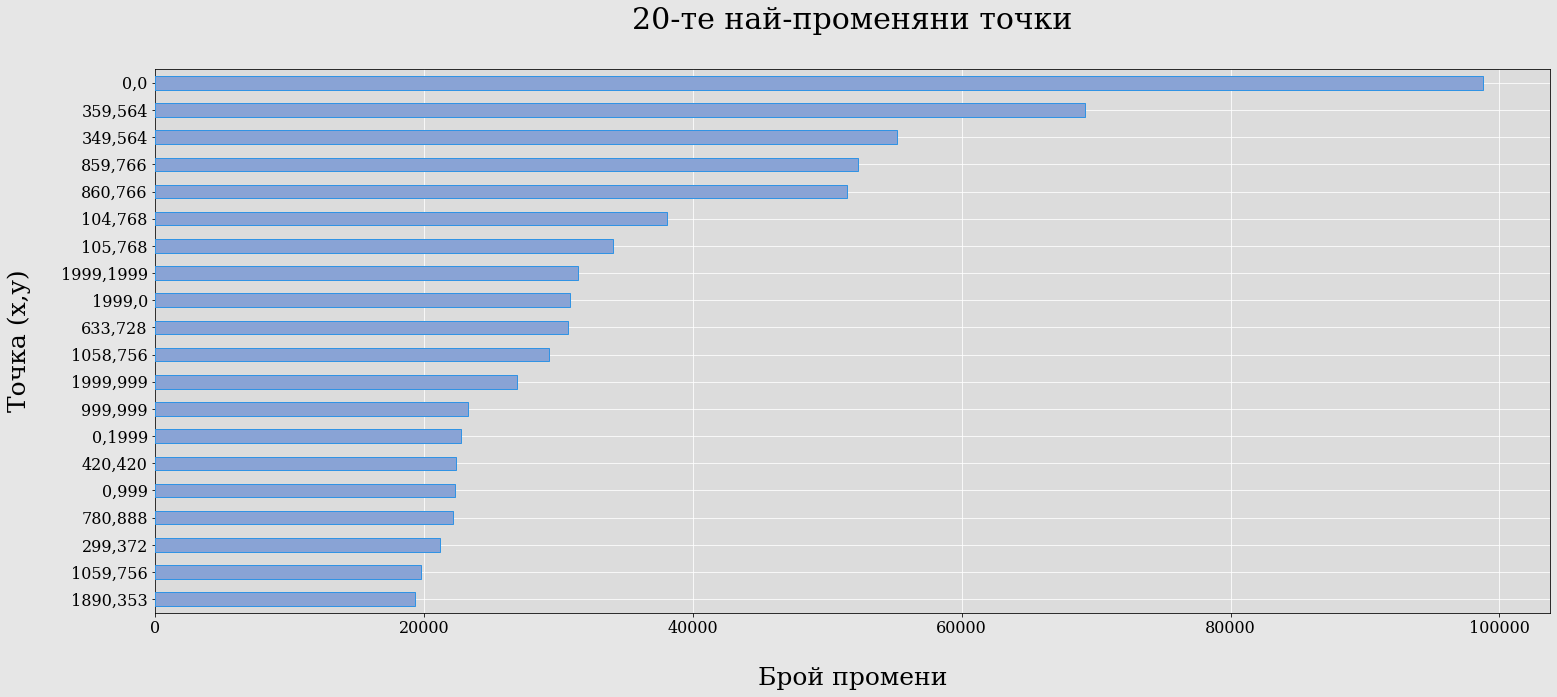

In [422]:
plot = top_active_spots.plot(kind='barh', zorder=3,  edgecolor='#3193E4')

plot.set_title('20-те най-променяни точки')
plot.set_xlabel('Брой промени')
plot.set_ylabel('Точка (x,y)')

plot.invert_yaxis()

In [423]:
if SAVE_FILES:
    now = datetime.now().strftime('%d%H%M')

    fig = plot.get_figure()
    fig.savefig(f'output\\plot_coordinates-{now}.png')

### Таблица, показваща броя пъти, през които е било нужно модериране

In [28]:
ddf_moderated = ddf_main.copy()

ddf_moderated['comma_count'] = ddf_moderated.coordinate.str.count(',')

ddf_moderated.head()

,timestamp,pixel_color,coordinate,comma_count
0,0,#7EED56,"42,42",1
1,12356,#00A368,"999,999",1
2,16311,#3690EA,"44,42",1
3,21388,#D4D7D9,"2,2",1
4,34094,#3690EA,"23,23",1


In [29]:
ddf_moderated = ddf_moderated[ddf_moderated['comma_count'] > 1]
ddf_moderated = ddf_moderated.drop('comma_count', axis=1)
ddf_moderated['timestamp'] = ddf_moderated.apply(lambda x: parse_timestamp(x['timestamp'], '%Y-%m-%d %H%M%S'), axis=1)
ddf_moderated = ddf_moderated.set_index('timestamp')
 
ddf_moderated.head()

c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\dask\dataframe\core.py:5408: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'datetime64[ns]'))

  warnings.warn(meta_warning(meta))


,pixel_color,coordinate
timestamp,,
2022-04-01 14:44:07,#898D90,"862,540,868,544"
2022-04-01 14:46:23,#898D90,"862,540,873,545"
2022-04-01 14:46:39,#898D90,"871,546,878,550"
2022-04-03 23:03:29,#FFB470,"298,1770,334,1803"
2022-04-03 23:05:04,#FFB470,"298,1805,329,1839"
2022-04-03 23:08:49,#FFB470,"257,1736,296,1780"
2022-04-03 23:10:36,#FFF8B8,"251,1805,296,1812"
2022-04-03 23:12:51,#FFF8B8,"271,1835,296,1859"
2022-04-03 23:29:51,#FFB470,"297,1750,364,1813"


In [31]:
list_coords = ddf_moderated['coordinate'].compute().apply(lambda x: x.split(','))

ddf_moderated['x1'] = list_coords[1][0].astype(int)
ddf_moderated['x2'] = list_coords[1][2].astype(int)
ddf_moderated['y1'] = list_coords[1][1].astype(int)
ddf_moderated['y2'] = list_coords[1][3].astype(int)

ddf_moderated['num_pixels'] = (ddf_moderated['x2'] - ddf_moderated['x1']) * (ddf_moderated['y2'] - ddf_moderated['y1'])

ddf_moderated.head()

timestamp
2022-04-01 14:44:07        [862, 540, 868, 544]
2022-04-01 14:46:23        [862, 540, 873, 545]
2022-04-01 14:46:39        [871, 546, 878, 550]
2022-04-03 23:03:29      [298, 1770, 334, 1803]
2022-04-03 23:05:04      [298, 1805, 329, 1839]
2022-04-03 23:08:49      [257, 1736, 296, 1780]
2022-04-03 23:10:36      [251, 1805, 296, 1812]
2022-04-03 23:12:51      [271, 1835, 296, 1859]
2022-04-03 23:29:51      [297, 1750, 364, 1813]
2022-04-04 01:22:50    [1349, 1718, 1424, 1752]
2022-04-04 04:12:20       [23, 1523, 172, 1792]
2022-04-04 04:16:10       [44, 1652, 165, 1899]
2022-04-04 04:29:41       [51, 1691, 154, 1807]
2022-04-04 15:58:32      [551, 1311, 562, 1342]
2022-04-04 15:59:10      [547, 1330, 550, 1342]
2022-04-04 19:29:48    [1373, 1400, 1419, 1436]
2022-04-04 19:29:49    [1371, 1438, 1418, 1472]
2022-04-04 19:29:49    [1372, 1472, 1406, 1497]
2022-04-04 19:29:49    [1375, 1355, 1424, 1399]
Name: coordinate, dtype: object

In [ ]:
moderated_colors_count = ddf_moderated['pixel_color'].compute().value_counts()

moderated_colors_count.head()

In [ ]:
ddf_moderated = ddf_moderated.drop('coordinate')
ddf_moderated = ddf_moderated.rename(columns={'timestamp': 'Дата и час (UTC)', 'pixel_color': 'Цвят (hex)', 'num_pixels': 'Брой пиксели'})

ddf_moderated.head()

# Анимирани диаграми

In [450]:
date_format = '%H:%M %d-%m-%Y'

bars_cmap = ['#000000', '#00A368', '#2450A4', '#3690EA', '#51E9F4', '#7EED56', '#811E9F', '#898D90', '#9C6926', '#B44AC0', '#D4D7D9', '#FF4500', '#FF99AA', '#FFA800', '#FFD635', '#FFFFFF', '#00756F', '#009EAA', '#00CC78', '#493AC1', '#6A5CFF', '#6D482F', '#BE0039', '#FF3881', '#00CCC0', '#515252', '#6D001A', '#94B3FF', '#DE107F', '#E4ABFF', '#FFB470', '#FFF8B8']
fixed_bars_cmap = ['#000000', '#FFFFFF', '#FF4500', '#2450A4', '#FFD635', '#BE0039', '#51E9F4', '#811E9F', '#FFA800', '#FF99AA', '#3690EA', '#00A368', '#898D90', '#7EED56', '#D4D7D9', '#9C6926', '#FFB470', '#FF3881', '#B44AC0', '#6D482F', '#00CC78', '#493AC1', '#FFF8B8', '#515252', '#6D001A', '#DE107F', '#00756F', '#6A5CFF', '#94B3FF', '#009EAA', '#E4ABFF', '#00CCC0']

### Анимирана диаграма, показваща броя поставени пиксели за всеки час

In [425]:
ddf_date['datetime'] = dd.to_datetime(ddf_date['datetime'])
ddf_date.dtypes

datetime    datetime64[ns]
dtype: object

In [426]:
ddf_datecount = ddf_date.datetime.value_counts('datetime').compute()
ddf_datecount.head()

2022-04-04 21:00:00    5901646
2022-04-04 22:00:00    5640455
2022-04-04 20:00:00    4904479
2022-04-04 19:00:00    4567933
2022-04-03 21:00:00    4480088
Name: datetime, dtype: int64

In [427]:
ddf_datecount = ddf_datecount.reset_index(name='num_placed_pixels').sort_values('index').set_index('index')
ddf_datecount.head()

,num_placed_pixels
index,
2022-04-01 12:00:00,19
2022-04-01 13:00:00,548836
2022-04-01 14:00:00,867847
2022-04-01 15:00:00,996924
2022-04-01 16:00:00,1070919


In [428]:
if SAVE_FILES:
    fig = plt.figure()
    ax = plt.axes()

    ax.set_title('Брой поставени пиксели за всеки час')
    ax.set_xlabel('Дата и час (UTC)')
    ax.set_ylabel('Брой поставени пиксели')

    ax.get_yaxis().get_major_formatter().set_scientific(False)

    now = datetime.now().strftime('%d%H%M')

    ddf_datecount.plot_animated(filename=f'output\\animated_activity-{now}.gif', 
        fig=fig, 
        add_legend=False, 
        kind='line', 
        linewidth=5,
        figsize=(25,10),
        period_fmt=date_format,
        period_label=False,
        tick_label_size=16,
        label_events={    
            '  Първи ден': datetime.strptime('00:00 01-04-2022', date_format),
            '  Втори ден': datetime.strptime('00:00 02-04-2022', date_format),
            '  Трети ден': datetime.strptime('00:00 03-04-2022', date_format),
            '  Четвърти ден': datetime.strptime('00:00 04-04-2022', date_format)
        },
        antialiased=True,
        )

Generating LineChart, plotting ['num_placed_pixels']


LineChart(df=                     num_placed_pixels
index                                 
2022-04-01 12:00:00               19.0
2022-04-01 12:12:00           109782.4
2022-04-01 12:24:00           219545.8
2022-04-01 12:36:00           329309.2
2022-04-01 12:48:00           439072.6
...                                ...
2022-04-04 23:12:00          2509747.8
2022-04-04 23:24:00          1962269.6
2022-04-04 23:36:00          1414791.4
2022-04-04 23:48:00           867313.2
2022-04-05 00:00:00           319835.0

[421 rows x 1 columns], interpolate_period=True, steps_per_period=5, period_length=500, period_fmt='%H:%M %d-%m-%Y', figsize=(25, 10), title=None, fig=<Figure size 1800x720 with 1 Axes>, cmap='dark24', tick_label_size=16, period_label=False, period_summary_func=None, fixed_max=False, dpi=144, writer=None, enable_progress_bar=False, kwargs={'linewidth': 5, 'antialiased': True}, line_width=2, label_events={'  Първи ден': datetime.datetime(2022, 4, 1, 0, 0), '  Втори ден': date

### Анимирана диаграма, показваща кумулативния брой поставени пиксели

In [444]:
if SAVE_FILES:
    fig = plt.figure()
    ax = plt.axes()

    ax.set_title('Кумулативен брой поставени пиксели')
    ax.set_xlabel('Дата и час (UTC)')
    ax.set_ylabel('Брой поставени пиксели')

    now = datetime.now().strftime('%d%H%M')

    ddf_datecount.cumsum().plot_animated(filename=f'output\\animated_activity_cumsum-{now}.gif', 
        fig=fig, 
        add_legend=False, 
        kind='line', 
        figsize=(25,10),
        period_fmt=date_format,
        period_label=False,
        tick_label_size=16,
        label_events={    
            '  Първи ден': datetime.strptime('00:00 01-04-2022', date_format),
            '  Втори ден': datetime.strptime('00:00 02-04-2022', date_format),
            '  Трети ден': datetime.strptime('00:00 03-04-2022', date_format),
            '  Четвърти ден': datetime.strptime('00:00 04-04-2022', date_format)
        },
        fill_under_line_color='#89A3D5',
        antialiased=True
        )

Generating LineChart, plotting ['num_placed_pixels']


LineChart(df=                     num_placed_pixels
index                                 
2022-04-01 12:00:00               19.0
2022-04-01 12:12:00           109786.2
2022-04-01 12:24:00           219553.4
2022-04-01 12:36:00           329320.6
2022-04-01 12:48:00           439087.8
...                                ...
2022-04-04 23:12:00        160097236.0
2022-04-04 23:24:00        160161203.0
2022-04-04 23:36:00        160225170.0
2022-04-04 23:48:00        160289137.0
2022-04-05 00:00:00        160353104.0

[421 rows x 1 columns], interpolate_period=True, steps_per_period=5, period_length=500, period_fmt='%H:%M %d-%m-%Y', figsize=(25, 10), title=None, fig=<Figure size 1800x720 with 1 Axes>, cmap='dark24', tick_label_size=16, period_label=False, period_summary_func=None, fixed_max=False, dpi=144, writer=None, enable_progress_bar=False, kwargs={'antialiased': True}, line_width=2, label_events={'  Първи ден': datetime.datetime(2022, 4, 1, 0, 0), '  Втори ден': datetime.datetime(20

### Анимирана графика, показваща броя и вида поставевни цветове за всеки час

In [434]:
ddf_pivoted['datetime'] = dd.to_datetime(ddf_pivoted['datetime'])
ddf_pivoted = ddf_pivoted.set_index('datetime')

In [435]:
ddf_pivoted = ddf_pivoted.compute()
type(ddf_pivoted)

pandas.core.frame.DataFrame

In [451]:
if SAVE_FILES:
    fig = plt.figure()
    ax = plt.axes()

    ax.set_title('Брой поставени пиксели според цвета за всеки час')
    ax.set_ylabel('Цвят (hex)')
    ax.set_xlabel('Брой пиксели')

    now = datetime.now().strftime('%d%H%M')

    ddf_pivoted.plot_animated(filename=f'output\\animated_colors-{now}.gif',    
        period_length=700,
        bar_label_size=14,
        add_legend=False, 
        figsize=(25,10),
        fig=fig,
        period_fmt=date_format,
        fixed_order=fixed_bars_cmap,
        period_label=True,
        tick_label_size=14,
        cmap=fixed_bars_cmap,
        antialiased=True
        )

Generating BarChartRace, plotting ['#000000', '#FFFFFF', '#FF4500', '#2450A4', '#FFD635', '#BE0039', '#51E9F4', '#811E9F', '#FFA800', '#FF99AA', '#3690EA', '#00A368', '#898D90', '#7EED56', '#D4D7D9', '#9C6926', '#FFB470', '#FF3881', '#B44AC0', '#6D482F', '#00CC78', '#493AC1', '#FFF8B8', '#515252', '#6D001A', '#DE107F', '#00756F', '#6A5CFF', '#94B3FF', '#009EAA', '#E4ABFF', '#00CCC0']


c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\charts.py:68: UserWarning: Plotting too many bars may result in undesirable output, use `n_visible=15` to limit number of bars
  warnings.warn(
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


BarChartRace(df=                     #000000    #FFFFFF  #FF4500  #2450A4  #FFD635  #BE0039  \
datetime                                                                      
2022-04-01 12:00:00      0.0        4.0      1.0      3.0      0.0      0.0   
2022-04-01 12:12:00  23502.2     6444.4  14010.2  16636.8  13389.8      0.0   
2022-04-01 12:24:00  47004.4    12884.8  28019.4  33270.6  26779.6      0.0   
2022-04-01 12:36:00  70506.6    19325.2  42028.6  49904.4  40169.4      0.0   
2022-04-01 12:48:00  94008.8    25765.6  56037.8  66538.2  53559.2      0.0   
...                      ...        ...      ...      ...      ...      ...   
2022-04-04 23:12:00      0.0  2509747.8      0.0      0.0      0.0      0.0   
2022-04-04 23:24:00      0.0  1962269.6      0.0      0.0      0.0      0.0   
2022-04-04 23:36:00      0.0  1414791.4      0.0      0.0      0.0      0.0   
2022-04-04 23:48:00      0.0   867313.2      0.0      0.0      0.0      0.0   
2022-04-05 00:00:00      0.0   31983

### Анимирана графика, показваща кумумулативния брой поставени пиксели от всеки цвят

In [437]:
plt.rcParams['xtick.labelsize'] = 0

fig = plt.Figure()
gs = plt.GridSpec(1,2, width_ratios=[4,1])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

fig.suptitle('Кумумулативен брой поставени пиксели от всеки цвят')
ax1.set_ylabel('Цвят (hex)')
ax1.set_xlabel('Брой пиксели (милиони)')

now = datetime.now().strftime('%d%H%M')

bar_chart = ddf_pivoted.cumsum().plot_animated(   
    period_length=700,
    bar_label_size=14,
    add_legend=False, 
    figsize=(25,10),
    period_fmt=date_format,
    period_label=True,
    tick_label_size=14,
    cmap=bars_cmap,
    antialiased=True,
    )

bar_chart.ax = ax1

pie_chart = ddf_pivoted.cumsum().plot_animated(  
    kind='pie',
    figsize=(10,10),
    cmap=bars_cmap,
    )

pie_chart.ax = ax2

if SAVE_FILES:
    pandas_alive.animate_multiple_plots(f'output\\animated_colors_cumsum-{now}.gif', [bar_chart,pie_chart], fig)

Generating BarChartRace, plotting ['#000000', '#00A368', '#2450A4', '#3690EA', '#51E9F4', '#7EED56', '#811E9F', '#898D90', '#9C6926', '#B44AC0', '#D4D7D9', '#FF4500', '#FF99AA', '#FFA800', '#FFD635', '#FFFFFF', '#00756F', '#009EAA', '#00CC78', '#493AC1', '#6A5CFF', '#6D482F', '#BE0039', '#FF3881', '#00CCC0', '#515252', '#6D001A', '#94B3FF', '#DE107F', '#E4ABFF', '#FFB470', '#FFF8B8']


c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\charts.py:221: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df.columns)
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\charts.py:222: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\charts.py:68: UserWarning: Plotting too many bars may result in undesirable output, use `n_visible=15` to limit number of bars
  warnings.warn(
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\_base_chart.py:458: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df.columns)
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\_base_chart.py:459: UserW

Generating PieChart, plotting ['#000000', '#00A368', '#2450A4', '#3690EA', '#51E9F4', '#7EED56', '#811E9F', '#898D90', '#9C6926', '#B44AC0', '#D4D7D9', '#FF4500', '#FF99AA', '#FFA800', '#FFD635', '#FFFFFF', '#00756F', '#009EAA', '#00CC78', '#493AC1', '#6A5CFF', '#6D482F', '#BE0039', '#FF3881', '#00CCC0', '#515252', '#6D001A', '#94B3FF', '#DE107F', '#E4ABFF', '#FFB470', '#FFF8B8']


c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [438]:
plt.style.use('style.mplstyle')

### Анимирана графика, показваща броя поставени пиксели в 5-те най-популярни точки за всеки час

In [439]:
ddf_top3_coords = dd.read_csv('data\\raw\\2022_place_canvas_history_core.csv')
ddf_top3_coords = ddf_top3_coords[(ddf_top3_coords['coordinate'] == '0,0') | (ddf_top3_coords['coordinate'] == '359,564') | (ddf_top3_coords['coordinate'] == '349,564') | (ddf_top3_coords['coordinate'] == '859,766') | (ddf_top3_coords['coordinate'] == '860,766')]
ddf_top3_coords = ddf_top3_coords.drop('pixel_color', axis=1)

ddf_top3_coords.head()

,timestamp,coordinate
10,169219,"0,0"
59,1184423,"0,0"
62,1184622,"0,0"
158,1192817,"0,0"
902,1221457,"0,0"


In [440]:
ddf_top3_coords['index'] = ddf_top3_coords.reset_index().index
ddf_top3_coords['timestamp'] = ddf_top3_coords.apply(lambda x: parse_timestamp(x['timestamp'], '%Y-%m-%d %H'), axis=1)
ddf_top3_coords = ddf_top3_coords.rename(columns={'timestamp': 'datetime'})

ddf_top3_coords.head()

c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\dask\dataframe\core.py:5408: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'datetime64[ns]'))

  warnings.warn(meta_warning(meta))


,datetime,coordinate,index
10,2022-04-01 12:00:00,"0,0",0
59,2022-04-01 13:00:00,"0,0",1
62,2022-04-01 13:00:00,"0,0",2
158,2022-04-01 13:00:00,"0,0",3
902,2022-04-01 13:00:00,"0,0",4


In [441]:
ddf_top3_coords['coordinate'] = ddf_top3_coords['coordinate'].astype('category')
ddf_top3_coords['coordinate'] = ddf_top3_coords.coordinate.cat.as_known()

ddf_top3_coords.dtypes

datetime      datetime64[ns]
coordinate          category
index                  int64
dtype: object

In [442]:
ddf_top3_coords = ddf_top3_coords.pivot_table(index='datetime', columns='coordinate', values='coordinate', aggfunc='count')
ddf_top3_coords = ddf_top3_coords.compute()

ddf_top3_coords.head()

coordinate,"0,0","349,564","359,564","859,766","860,766"
datetime,,,,,
2022-04-01 12:00:00,1.0,0.0,0.0,0.0,0.0
2022-04-01 13:00:00,777.0,1.0,1.0,0.0,2.0
2022-04-01 14:00:00,705.0,0.0,0.0,751.0,670.0
2022-04-01 15:00:00,811.0,0.0,0.0,1759.0,1635.0
2022-04-01 16:00:00,1198.0,484.0,573.0,1601.0,1598.0


In [443]:
if SAVE_FILES:
    fig = plt.figure()
    ax = plt.axes()

    ax.set_title('Брой поставени пиксели за всеки час в 5-те най-популярни точки')
    ax.set_xlabel('Дата и час (UTC)')
    ax.set_ylabel('Брой пиксели')

    now = datetime.now().strftime('%d%H%M')

    ddf_top3_coords.plot_animated(filename=f'output\\animated_top5_coords-{now}.gif', 
        fig=fig, 
        add_legend=True, 
        linewidth=5,
        kind='line', 
        figsize=(25,10),
        period_fmt=date_format,
        period_label=False,
        tick_label_size=16,
        label_events={    
            '  Първи ден': datetime.strptime('00:00 01-04-2022', date_format),
            '  Втори ден': datetime.strptime('00:00 02-04-2022', date_format),
            '  Трети ден': datetime.strptime('00:00 03-04-2022', date_format),
            '  Четвърти ден': datetime.strptime('00:00 04-04-2022', date_format)
        },
        antialiased=True
        )

Generating LineChart, plotting ['0,0', '349,564', '359,564', '859,766', '860,766']


LineChart(df=coordinate               0,0  349,564  359,564  859,766  860,766
datetime                                                        
2022-04-01 12:00:00      1.0      0.0      0.0      0.0      0.0
2022-04-01 12:12:00    156.2      0.2      0.2      0.0      0.4
2022-04-01 12:24:00    311.4      0.4      0.4      0.0      0.8
2022-04-01 12:36:00    466.6      0.6      0.6      0.0      1.2
2022-04-01 12:48:00    621.8      0.8      0.8      0.0      1.6
...                      ...      ...      ...      ...      ...
2022-04-04 23:12:00  12893.2      1.6      2.4      0.2      0.8
2022-04-04 23:24:00  13573.4      1.2      1.8      0.4      0.6
2022-04-04 23:36:00  14253.6      0.8      1.2      0.6      0.4
2022-04-04 23:48:00  14933.8      0.4      0.6      0.8      0.2
2022-04-05 00:00:00  15614.0      0.0      0.0      1.0      0.0

[421 rows x 5 columns], interpolate_period=True, steps_per_period=5, period_length=500, period_fmt='%H:%M %d-%m-%Y', figsize=(25, 10), title=